# Lab02: Gradient Descent.

- Student ID: 21127099
- Student name: Nguyễn Tấn Lộc

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Gradient descent.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import warnings

### 3.2. Create data

In [86]:
# generate a 2-class classification problem with 1,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
-- allows us to treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [87]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    return x * (1 - x)
    # return sigmoid_activation(x) * (1 - sigmoid_activation(x))


#### Compute output

In [88]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    return sigmoid_activation(np.dot(X, W))
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    #preds=?
    preds = sigmoid_activation(np.dot(X, W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [89]:
W = np.random.randn(X.shape[1], 1)
W_copy=W.copy()
losses = []
W

array([[-0.91980279],
       [-1.15958446],
       [ 1.34060871]])

#### Compute gradient

In [90]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient = np.dot(trainX.T, error * sigmoid_deriv(h))
    gradient/=len(trainX)
    return gradient

#### Training function 

In [91]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [92]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=23.0308866
Epoch=5, loss=22.8550494
Epoch=10, loss=22.6393767
Epoch=15, loss=22.4281633
Epoch=20, loss=22.2212819
Epoch=25, loss=22.0186094
Epoch=30, loss=21.8200268
Epoch=35, loss=21.6254192
Epoch=40, loss=21.4346754
Epoch=45, loss=21.2476878
Epoch=50, loss=21.0643525
Epoch=55, loss=20.8845690
Epoch=60, loss=20.7082401
Epoch=65, loss=20.5352719
Epoch=70, loss=20.3655733
Epoch=75, loss=20.1990564
Epoch=80, loss=20.0356361
Epoch=85, loss=19.8752300
Epoch=90, loss=19.7177584
Epoch=95, loss=19.5631443
Epoch=100, loss=19.4113130


#### Evaluate result

In [93]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       250
           1       0.90      1.00      0.95       250

    accuracy                           0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



A `true positive` is an outcome where the model correctly predicts the positive class. Similarly, a `true negative` is an outcome where the model correctly predicts the negative class.

A `false positive` is an outcome where the model incorrectly predicts the positive class. And a `false negative` is an outcome where the model incorrectly predicts the negative class.

![Confusion matrix](img2.png) <center>**Figure 2. A summary visual of the confusion matrix. Source: blog.dailydoseofds.com**<center>

**TODO: Study about accuracy, recall, precision, f1-score.**

*Note*: TP is the number of true positives and TN is the number of true negatives. FP is the number of false positives and TN is the number of false negatives.

- **Accuracy**: is a metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. 

Formally, accuracy has the following definition:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Accuracy</mtext>
  <mo>=</mo>
  <mfrac>
    <mtext>Number of correct predictions</mtext>
    <mtext>Total number of predictions</mtext>
  </mfrac>
</math>

For binary classification
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

- **Recall**: is the fraction of relevant instances that were retrieved. It is defined as follows:

$$Recall = \frac{TP}{TP+FN}$$

- **Precision**:is the proportion of correct positive classifications (true positive) divided by the total number of predicted positive classifications that were made (true positive + false positive). It is defined as follows:
$$Precision = \frac{TP}{TP+FP}$$

*The trade-off between Precision and Recall in binary classification involves the challenge of balancing high values for both metrics, often resulting in a scenario where improving one adversely affects the other. Achieving high Precision implies minimizing false positives, while high Recall involves capturing most true positives. The difficulty lies in finding a model that excels in both aspects simultaneously. F1 Score emerges as a solution, harmonizing Precision and Recall into a singular metric for overall model evaluation, particularly useful when considering both metrics' significance. Depending on the context, prioritizing Precision or Recall might be necessary—prioritizing Precision to avoid false positives or favoring Recall to capture more true positives, reflecting the specific needs and nuances of the problem at hand.*

- F1: is a metric that combines precision and recall scores. It gives the combined information about the precision and recall of a model. This means a high F1-score indicates a high value for both recall and precision.
%!TEX TS-program = xelatex
%!TEX encoding = UTF-8 Unicode
$$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$$

![Calculate Metricx](img3.png) <center>**Figure 3. Example. Source: Slides from Moodle**<center>

$ \to $ Precision - Recall - F1 are metrics used to evaluate the effectiveness of a machine learning model when solving classification problems, especially in cases where there is a significant imbalance in the number of samples among different classes. Each metric carries a distinct meaning and calculation method.

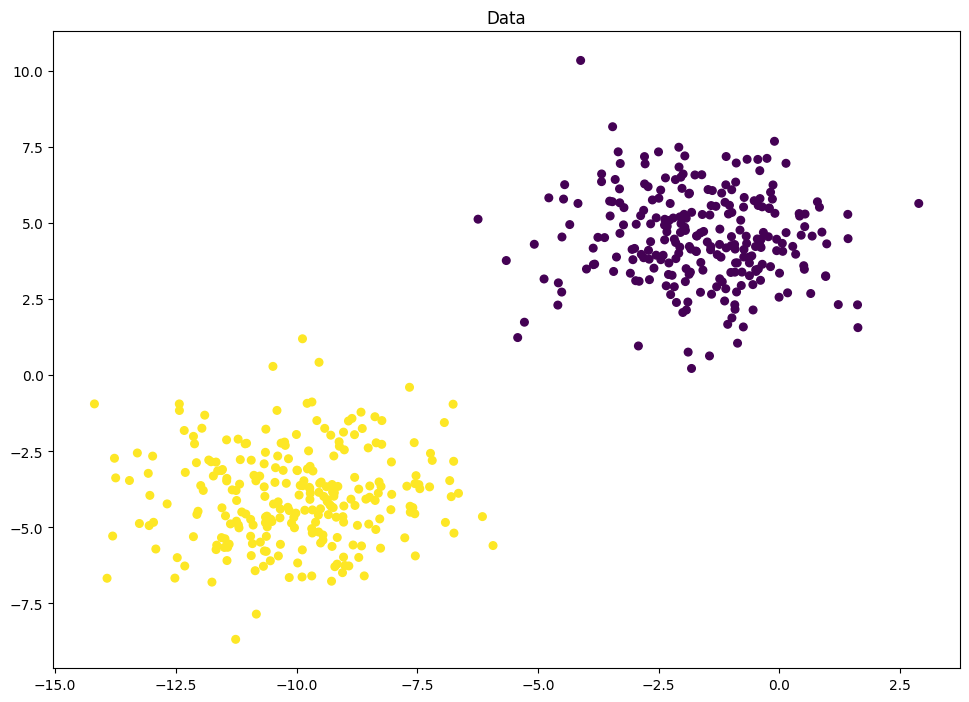

In [94]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

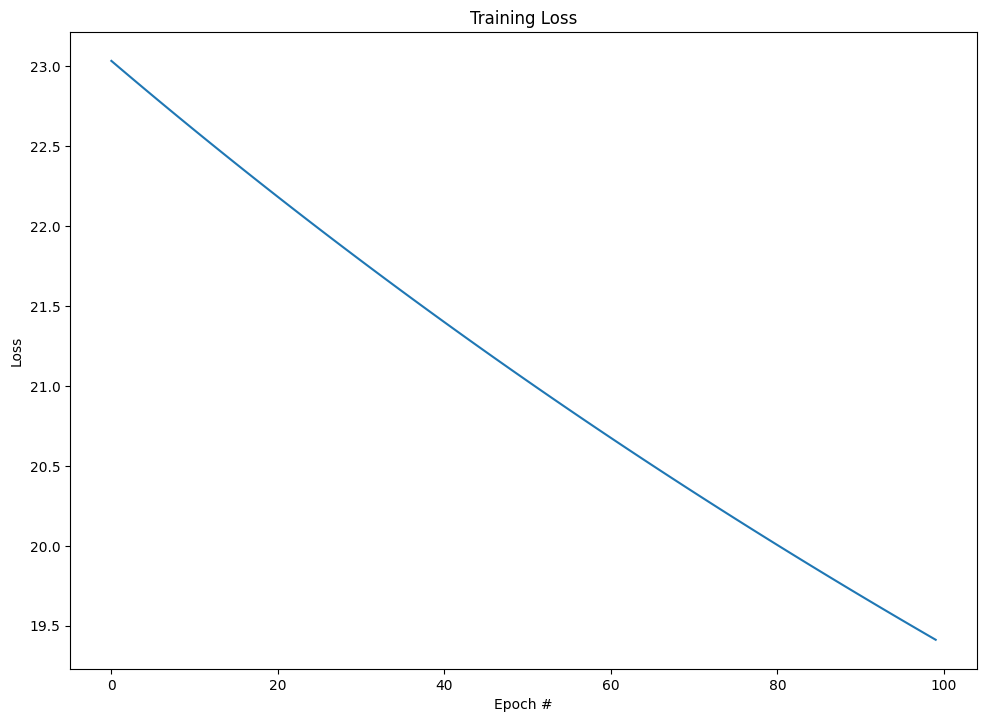

In [95]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observation**

In [96]:
warnings.filterwarnings('ignore') #suppress warnings

#### (New) Learning rate :  0.00005, 0.005, 0.05, 0.5, 5, 15

In [97]:
W_1=W_copy
W_1

array([[-0.91980279],
       [-1.15958446],
       [ 1.34060871]])

Learning Rate: 5e-05

Epoch=1, loss=23.0308866
Epoch=5, loss=23.0300010
Epoch=10, loss=23.0288940
Epoch=15, loss=23.0277871
Epoch=20, loss=23.0266804
Epoch=25, loss=23.0255737
Epoch=30, loss=23.0244672
Epoch=35, loss=23.0233608
Epoch=40, loss=23.0222545
Epoch=45, loss=23.0211483
Epoch=50, loss=23.0200423
Epoch=55, loss=23.0189364
Epoch=60, loss=23.0178305
Epoch=65, loss=23.0167248
Epoch=70, loss=23.0156193
Epoch=75, loss=23.0145138
Epoch=80, loss=23.0134084
Epoch=85, loss=23.0123032
Epoch=90, loss=23.0111981
Epoch=95, loss=23.0100931
Epoch=100, loss=23.0089882
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       250
           1       0.88      1.00      0.94       250

    accuracy                           0.93       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.93      0.93       500


Learning Rate: 0.005

Epoch=1, loss=23.0087672
Epoch=5, loss=22.9207098
Epoch=10, loss=22.8116778
Epoch=1

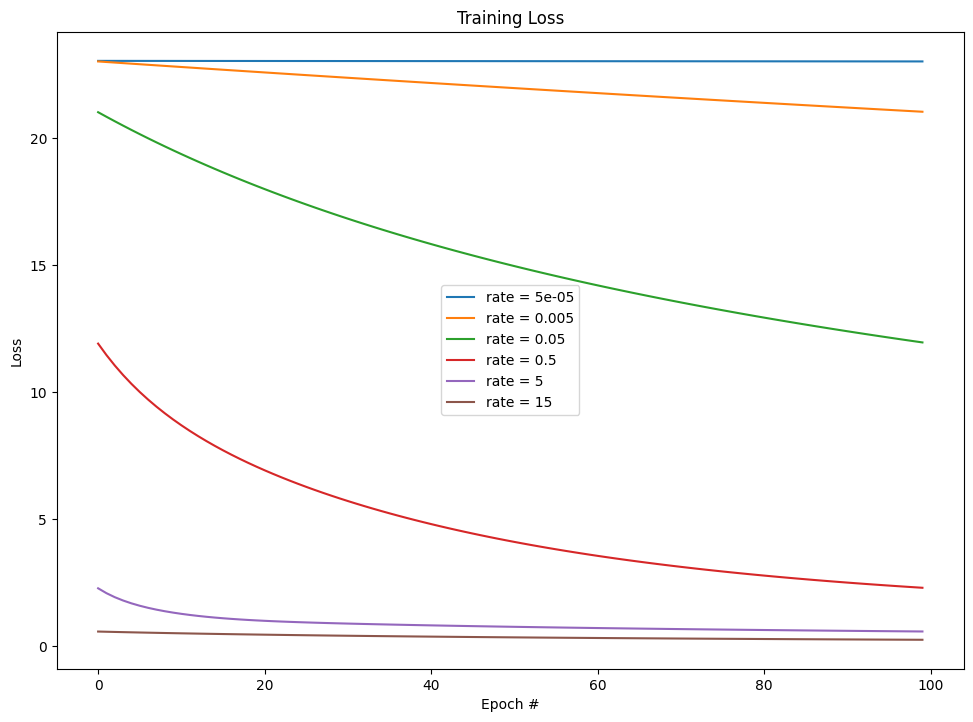

In [98]:
learning_rate = [0.00005, 0.005, 0.05, 0.5, 5, 15]
losses_list = []
plt.figure(figsize=(11.7,8.27))
with open('result.txt', 'w') as file: #I'd like to save the outcomes into a file for convenient viewing.
    for i in range(len(learning_rate)):
        file.write(f"Learning Rate: {learning_rate[i]}\n")
        print(f"Learning Rate: {learning_rate[i]}\n")
        losses = []
        W_new = train(W_1, trainX, trainY, learning_rate[i], num_epochs)
        losses_list.append(losses)
        preds = predict(W_new, testX)
        report = classification_report(testY, preds)
        print(classification_report(testY, preds))
        file.write(report + '\n\n')
        plt.plot(range(0, num_epochs), losses_list[-1], label=f"rate = {learning_rate[i]}")
        file.write("Epoch-wise Losses:\n")
        for epoch, loss in enumerate(losses_list[-1], start=1):
            file.write(f"Epoch={epoch}, loss={loss}\n")
        file.write("\n")
        print()

# Plotting the losses graph
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig('losses_plot.png')  # Save the plot as an image file
plt.show()

My observations:

- **0.00005**: The loss decreases very slowly, this learning rate might be too small and the model could take a long time to converge.
- **0.005**: This learning rate seems optimal as it results in a steady and rapid decrease in training loss.
- **0.05**: The loss decreases rapidly initially but then plateaus, indicating that it might be slightly too high and the model is not converging further.
- **0.5**: The training loss remains constant, suggesting that this learning rate is not effective for reducing the loss.
- **5 and 15**: The training loss increases sharply, indicating that these learning rates are too high and causing divergence.

In summary, a learning rate of 0.005 appears to be the most effective for this model based on 1000 data points.

**Imagine the learning rate as the speed of a car journeying through the landscape of knowledge. Too slow, and the car may never reach its destination, lost in the vast expanse of information. This is akin to a low learning rate, where the model's learning is sluggish, and convergence is a distant dream.**

**On the other hand, a car speeding recklessly may miss important landmarks or even veer off the road, much like a high learning rate causing the model to overshoot the minimum and oscillate without settling.**

## 4. References

(1) Classification: Accuracy | Machine Learning | Google for Developers. https://developers.google.com/machine-learning/crash-course/classification/accuracy.

(2) Accuracy vs. precision vs. recall in machine learning: what's the .... https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall.

(3) What is a “Good” Accuracy for Machine Learning Models?. https://www.statology.org/good-accuracy-machine-learning/.

(4) Accuracy (error rate) Definition | DeepAI. https://deepai.org/machine-learning-glossary-and-terms/accuracy-error-rate.

(5) Classification: Precision and Recall | Machine Learning | Google for .... https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall.

(6) Precision and recall - Wikipedia. https://en.wikipedia.org/wiki/Precision_and_recall.

(7) What is Recall | Iguazio. https://www.iguazio.com/glossary/recall/.

(8) sklearn.metrics.recall_score — scikit-learn 1.3.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html.

(9) Recall, Precision, F1 Score - Inside Machine Learning. https://inside-machinelearning.com/en/recall-precision-f1-score-simple-metric-explanation-machine-learning/.

(10) What is Precision in Machine Learning - Deepchecks. https://deepchecks.com/glossary/precision-in-machine-learning/.

(11) Precision and Recall | Essential Metrics for Machine Learning. https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/.

(12) Precision-Recall Curve | ML - GeeksforGeeks. https://www.geeksforgeeks.org/precision-recall-curve-ml/.

(13) sklearn.metrics.precision_score — scikit-learn 1.3.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html.

(14) Precision - C3 AI. https://c3.ai/glossary/machine-learning/precision/.

(15) F1 Score in Machine Learning: Intro & Calculation. https://www.v7labs.com/blog/f1-score-guide.

(16) F-Score Definition | DeepAI. https://deepai.org/machine-learning-glossary-and-terms/f-score.

(17) What is f1 score in Machine Learning? - Life With Data. https://lifewithdata.com/2022/02/22/what-is-f1-score-in-machine-learning/.

(18) What is F1-score and what is it's importance in Machine learning .... https://vidyasheela.com/what-is-f1-score-and-what-is-its-importance-in-machine-learning/.

(19) Neural networks: Deriving the sigmoid derivative via chain and quotient rules. https://hausetutorials.netlify.app/posts/2019-12-01-neural-networks-deriving-the-sigmoid-derivative/#:~:text=The%20derivative%20of%20the%20sigmoid%20function%20%CF%83(x)%20is%20the,1%E2%88%92%CF%83(x).

(20) Gradient Descent with Python. https://pyimagesearch.com/2016/10/10/gradient-descent-with-python/

(21) Use The "Two Questions Technique" To Never Struggle With TP, TN, FP and FN Again. https://www.blog.dailydoseofds.com/p/use-the-two-questions-technique-to